# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
states[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -6.4669857 , -1.5       ,  0.        ,  0.        ,
       -6.83172083,  6.        ,  0.        ,  0.        ])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
from maddpg import Agent
from collections import deque
import torch
import matplotlib.pyplot as plt

# High Level Parameters
ACCEPTED_SCORE = 0.5
ADD_NOISE = True
PRINT_EVERY = 20
MAX_LENGTH_WINDOW = 100

# Initilize agents
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

In [9]:
def maddpg(max_episode=2000, max_time=1000, train_mode=True):
    """
    Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Parameters:
    max_episode (int)   : Number of Episode to train
    max_time(int)       : Number of timestep for each episode
    train_mode (bool)   : True is training mode
    """
    
    score_window = deque(maxlen=MAX_LENGTH_WINDOW)
    score_all = []
    avg_score = []
    
    best_score = -np.inf
    best_episode = 0
    
    for i_episode in range(1, max_episode+1):
        env_info = env.reset(train_mode = train_mode)[brain_name]    # reset environment
        states = np.reshape(env_info.vector_observations, (1,48))    # convert state (2,24) to (1,48)
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        
        while True:
            
            # get actions (from trained policy)
            action_0 = agent_0.act(states, ADD_NOISE)
            action_1 = agent_1.act(states, ADD_NOISE)
            actions = np.concatenate((action_0, action_1), axis = 0).flatten()
            
            # get next_state, reward, done from environment after taking action for both agents
            env_info = env.step(actions)[brain_name] 
            next_states = np.reshape(env_info.vector_observations, (1, 48))  # next state
            rewards = env_info.rewards                                       # reward
            done = env_info.local_done                                       # episode finishes if True
            
            # Two agents learn experience
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
            
            # calculate score and check environment status
            scores += np.max(rewards)
            states = next_states
            if np.any(done):
                break
            
        episode_best_score = np.max(scores)              # find the best score for each episode
        score_window.append(episode_best_score)          # add score in 100 window size
        score_all.append(episode_best_score)             # collect all score
        avg_score.append(np.mean(score_window))  # Average score
        
        # check best score and best episode
        if episode_best_score > best_score:
            best_score = episode_best_score
            best_episode = i_episode
            
        # print result
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tAverage Score: {:.3f}'.format(
                i_episode-PRINT_EVERY+1, i_episode, np.max(score_all[-PRINT_EVERY:]), avg_score[-1]))
            
        # Save trained weights when the score meets the accepted level
        if avg_score[-1] >= ACCEPTED_SCORE:
            print('--Environment solved in {:d} episodes with average Score: {:.3f}'.format(
                i_episode-MAX_LENGTH_WINDOW, avg_score[-1]))
            torch.save(agent_0.actor_local.state_dict(), 'actor_0.pth')
            torch.save(agent_0.critic_local.state_dict(), 'critic_0.pth')
            torch.save(agent_1.actor_local.state_dict(), 'actor_1.pth')
            torch.save(agent_1.critic_local.state_dict(), 'critic_1.pth')
            break
            
    return score_all, avg_score

In [10]:
# activate code
scores, avgs = maddpg()

Episodes 0001-0020	Max Reward: 0.100	Average Score: 0.005
Episodes 0021-0040	Max Reward: 0.100	Average Score: 0.008
Episodes 0041-0060	Max Reward: 0.100	Average Score: 0.022
Episodes 0061-0080	Max Reward: 0.100	Average Score: 0.030
Episodes 0081-0100	Max Reward: 0.200	Average Score: 0.041
Episodes 0101-0120	Max Reward: 0.300	Average Score: 0.060
Episodes 0121-0140	Max Reward: 0.200	Average Score: 0.078
Episodes 0141-0160	Max Reward: 0.200	Average Score: 0.081
Episodes 0161-0180	Max Reward: 0.400	Average Score: 0.094
Episodes 0181-0200	Max Reward: 0.200	Average Score: 0.101
Episodes 0201-0220	Max Reward: 0.200	Average Score: 0.105
Episodes 0221-0240	Max Reward: 0.200	Average Score: 0.103
Episodes 0241-0260	Max Reward: 0.200	Average Score: 0.106
Episodes 0261-0280	Max Reward: 0.200	Average Score: 0.105
Episodes 0281-0300	Max Reward: 0.200	Average Score: 0.101
Episodes 0301-0320	Max Reward: 0.400	Average Score: 0.110
Episodes 0321-0340	Max Reward: 0.300	Average Score: 0.118
Episodes 0341-

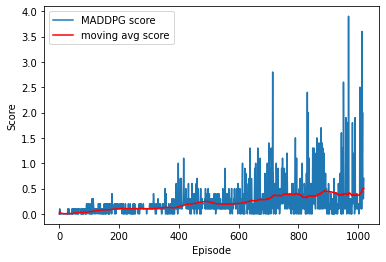

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG score')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg score')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper left');
plt.show()